# Project: FoodHub Data Analysis

![Food delivery image](food-delivery.jpg)

### Context

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

### Objective

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are hired as a Data Scientist in this company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business.

### Data Description

The data contains the different data related to a food order. The detailed data dictionary is given below.

### Data Dictionary

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

### Let us start by importing the required libraries

In [ ]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# to restrict the float value to 3 decimal places
pd.set_option('display.float_format', lambda x: '%.3f' % x)

### Understanding the structure of the data

In [ ]:
# uncomment and run the following lines for Google Colab
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# read the data
df = pd.read_csv('/content/drive/MyDrive/Univ Tex AI & Machine Learning/FoodHub Project/foodhub_order.csv')
# returns the first 5 rows
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.750,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.080,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.230,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.200,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.590,Weekday,4,25,24


#### Observations:

The DataFrame has 9 columns as mentioned in the Data Dictionary. Data in each row corresponds to the order placed by a customer.
* The order_id column includes the unique identifier given to each order
* The customer_id column includes each unique identifier given to each customer
* The restaurant_name column includes that names of all the restaurants in this dataset
* The cuisine_type column includes categorical names assigned to regional food types
* The cost_of_the_order columns is pretty self-explanatory
* The day_of_the_week column contains to categorical variables representing weekday and weekend
* The ratings column is a categorical column
* The food_preparation_time column reflects the amount of time it took to prepare the ordered food
* The delivery_time column reflects the amount of time it took to deliver the food

### **Question 1:** How many rows and columns are present in the data? [0.5 mark]

In [ ]:
# Shape gives us the row and column count in a dataset
df.shape
print("There are", df.shape[0], 'rows and', df.shape[1], "columns.")

There are 1898 rows and 9 columns.


#### Observations:
### My observation is that there are 1898 rows and 9 columns in this dataset


### **Question 2:** What are the datatypes of the different columns in the dataset? (The info() function can be used) [0.5 mark]

In [ ]:
# info() gives a concise summary of the DataFrame
df.info();

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


#### Observations:
### We can see from the info above that we have 4 columns with integer values, 4 columns that are object values and 1 column with float values.


### **Question 3:** Are there any missing values in the data? If yes, treat them using an appropriate method. [1 mark]

In [ ]:
df.isnull().sum()

order_id                 0
customer_id              0
restaurant_name          0
cuisine_type             0
cost_of_the_order        0
day_of_the_week          0
rating                   0
food_preparation_time    0
delivery_time            0
dtype: int64

#### Observations:
### On initial evaluation it seems there are no missing values in this dataset as far as null or NaN are concerned. Though, as we did deeper into univariante analysis, we do find that there are "Not Rated" values in the "rating" column that need to be treated.


### **Question 4:** Check the statistical summary of the data. What is the minimum, average, and maximum time it takes for food to be prepared once an order is placed? [2 marks]

In [ ]:
# Statistical Summary
df.describe().T

,count,mean,std,min,25%,50%,75%,max
order_id,1898.000,1477495.500,548.050,1476547.000,1477021.250,1477495.500,1477969.750,1478444.000
customer_id,1898.000,171168.478,113698.140,1311.000,77787.750,128600.000,270525.000,405334.000
cost_of_the_order,1898.000,16.499,7.484,4.470,12.080,14.140,22.297,35.410
food_preparation_time,1898.000,27.372,4.632,20.000,23.000,27.000,31.000,35.000
delivery_time,1898.000,24.162,4.973,15.000,20.000,25.000,28.000,33.000


In [ ]:
df.duplicated().sum()

0

#### Observations:

### In our FoodHub dataset, the minimum time it takes for food to be prepared is 20 mins. The average time is 27 minutes and the max time is 35 minutes


### **Question 5:** How many orders are not rated? [1 mark]

In [ ]:
# Find the
df.rating

0       Not given
1       Not given
2               5
3               3
4               4
          ...    
1893            5
1894            5
1895    Not given
1896            5
1897    Not given
Name: rating, Length: 1898, dtype: object

In [ ]:
df['rating'].unique()

array(['Not given', '5', '3', '4'], dtype=object)

In [ ]:
df['rating'].value_counts()

Not given    736
5            588
4            386
3            188
Name: rating, dtype: int64

In [ ]:
df['rating'].value_counts(normalize=True)

Not given   0.388
5           0.310
4           0.203
3           0.099
Name: rating, dtype: float64

In [ ]:
df['rating']= df['rating'].replace("Not given", '4')

In [ ]:
df['rating'].value_counts()

4    1122
5     588
3     188
Name: rating, dtype: int64

In [ ]:
df['rating']=df['rating'].astype(int)

In [ ]:
df['rating'].apply(type)

0       <class 'int'>
1       <class 'int'>
2       <class 'int'>
3       <class 'int'>
4       <class 'int'>
            ...      
1893    <class 'int'>
1894    <class 'int'>
1895    <class 'int'>
1896    <class 'int'>
1897    <class 'int'>
Name: rating, Length: 1898, dtype: object

#### Observations:
### As we can see in the code above, there are 736 rows where ratings were not given. This accounts for approx. 39% of the data for that column. I treated these values by replacing all "Not given" values with the Median Rating of 4. As there isn't a perfect way to treat these missing values, I thought the fairest way to do so was to use Median. Prior to treatment, 50% of the rated values were comprised of 4's & 5's. With that in mind, I felt that changing almost 39% of the values to the highest rating would skew my data to far to the right. I tried to give it a more balanced treatment.


### Exploratory Data Analysis (EDA)

### Univariate Analysis

### **Question 6:** Explore all the variables and provide observations on their distributions. (Generally, histograms, boxplots, countplots, etc. are used for univariate exploration.) [9 marks]

In [ ]:
# check unique order_id
df['order_id'].nunique()

1898

In [ ]:
# check unique customer ID
df['customer_id'].nunique()

1200

In [ ]:
# check unique Restaurant Name
df['restaurant_name'].nunique()

178

In [ ]:
df['restaurant_name'].value_counts()

Shake Shack                  219
The Meatball Shop            132
Blue Ribbon Sushi            119
Blue Ribbon Fried Chicken     96
Parm                          68
                            ... 
Sushi Choshi                   1
Dos Caminos Soho               1
La Follia                      1
Philippe Chow                  1
'wichcraft                     1
Name: restaurant_name, Length: 178, dtype: int64

In [ ]:
# Check unique cuisine type
df['cuisine_type'].nunique()

14

In [ ]:
df['cuisine_type'].unique()

array(['Korean', 'Japanese', 'Mexican', 'American', 'Indian', 'Italian',
       'Mediterranean', 'Chinese', 'Middle Eastern', 'Thai', 'Southern',
       'French', 'Spanish', 'Vietnamese'], dtype=object)

In [ ]:
df['cuisine_type'].value_counts()

American          584
Japanese          470
Italian           298
Chinese           215
Mexican            77
Indian             73
Middle Eastern     49
Mediterranean      46
Thai               19
French             18
Southern           17
Korean             13
Spanish            12
Vietnamese          7
Name: cuisine_type, dtype: int64

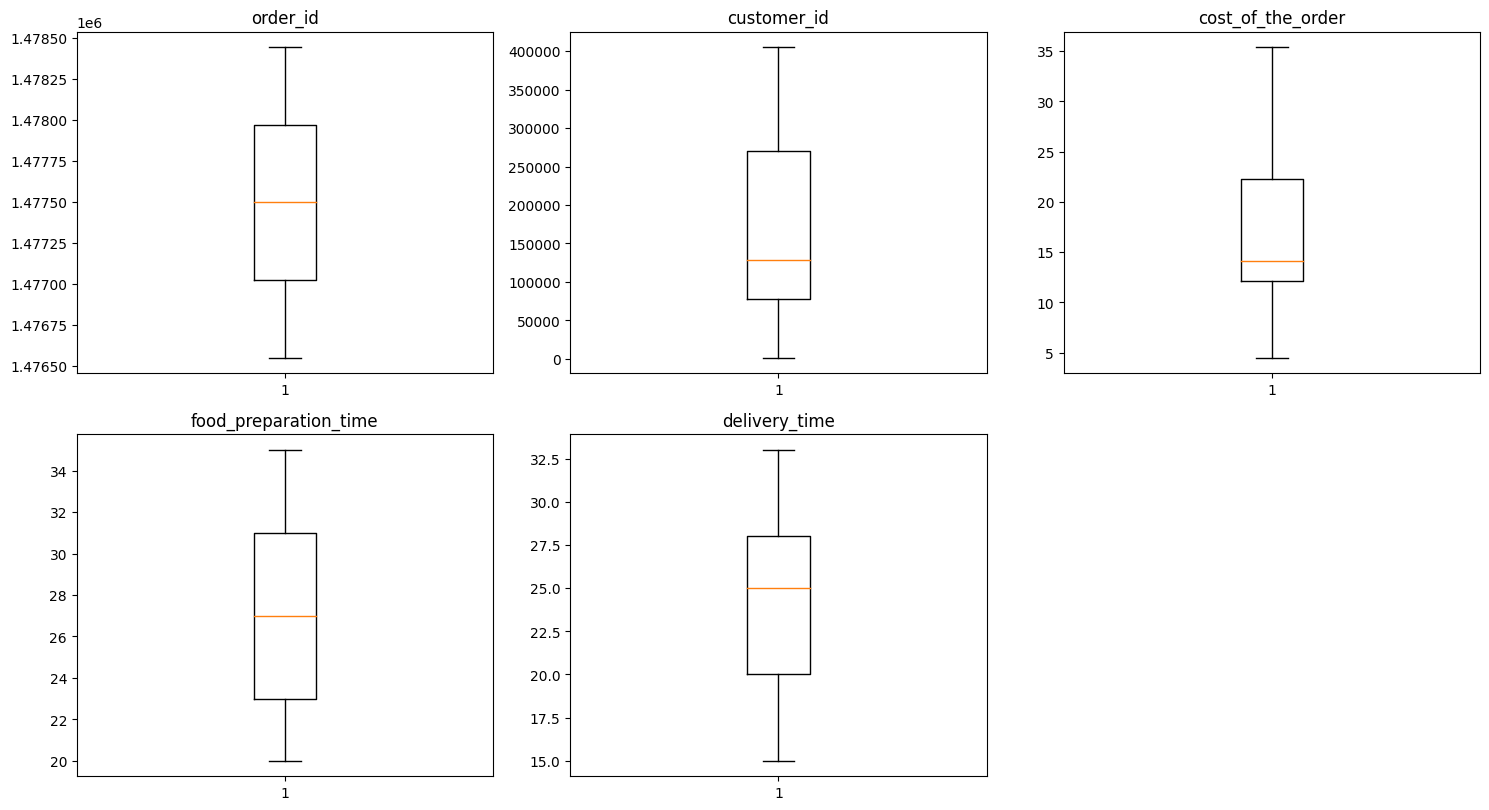

In [ ]:
# Write the code here
numeric_columns = ['order_id', 'customer_id', 'cost_of_the_order', 'food_preparation_time', 'delivery_time', ]
plt.figure(figsize=(15, 12))

for i, variable in enumerate(numeric_columns):
    plt.subplot(3, 3, i + 1)
    plt.boxplot(df[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

## Cost of Order Section

In [ ]:
df['cost_of_the_order'].nunique()

312

In [ ]:
df['cost_of_the_order'].unique()

array([30.75, 12.08, 12.23, 29.2 , 11.59, 25.22,  6.07,  5.97, 16.44,
        7.18,  5.92,  8.1 , 24.3 , 11.3 , 12.13, 16.2 , 16.98, 33.03,
       14.12, 24.2 , 15.91, 29.1 ,  8.92, 15.86, 21.88, 14.02,  9.17,
       12.18, 31.33, 29.05,  8.39,  9.12, 15.47, 16.01, 29.83, 19.89,
       19.35, 33.22, 24.25, 22.75,  6.74, 13.78, 16.93, 29.39, 20.23,
       14.6 ,  6.79, 31.38,  8.34, 12.46, 14.55, 32.93,  8.  , 13.05,
        5.67, 29.29, 16.15, 13.34,  9.75,  6.69,  4.75, 12.56, 21.2 ,
       19.31, 16.3 , 25.27, 14.79,  5.72,  9.22, 16.39, 17.03, 21.83,
       31.29, 11.83, 22.26, 20.47, 15.81, 22.36,  8.68, 12.9 , 29.15,
        7.86, 16.1 , 12.95, 11.69, 12.32, 14.99, 10.38,  9.65,  5.77,
        9.56, 29.34, 11.16, 14.07, 22.8 , 15.23, 16.49,  8.83, 16.25,
       16.83, 10.24, 19.4 , 13.97, 13.  ,  8.49, 20.18, 19.59, 16.11,
       12.27, 13.39,  9.02, 15.33, 31.43, 29.35, 15.28,  9.6 ,  8.88,
       15.96,  8.05,  8.54,  7.23, 19.69,  9.27,  8.97, 11.64, 13.15,
        9.41,  9.07,

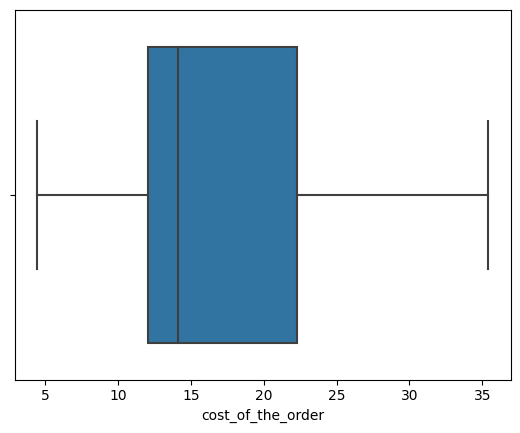

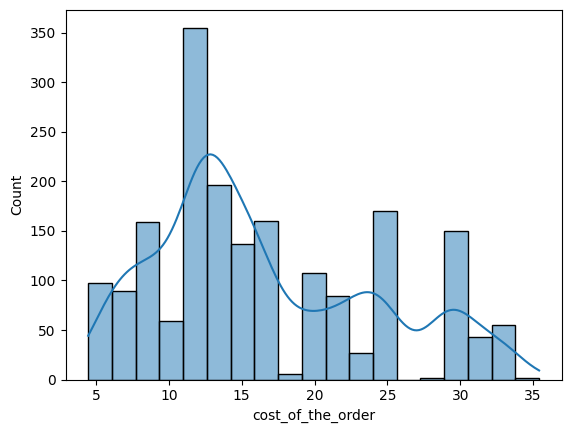

In [ ]:
# Cost of the Order boxplot
sns.boxplot(data=df, x="cost_of_the_order")
plt.show()
# Cost of the Order histogram
sns.histplot(data=df, x='cost_of_the_order', kde=True)
plt.show()

## Food Preparation Time Section

<Axes: xlabel='food_preparation_time'>

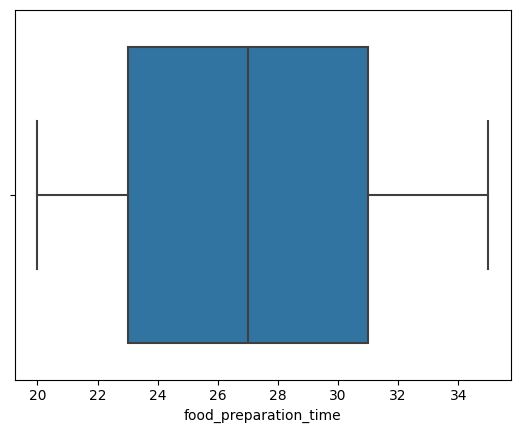

In [ ]:
# Food Prep boxplot
sns.boxplot(data=df, x='food_preparation_time')

## Rating Section

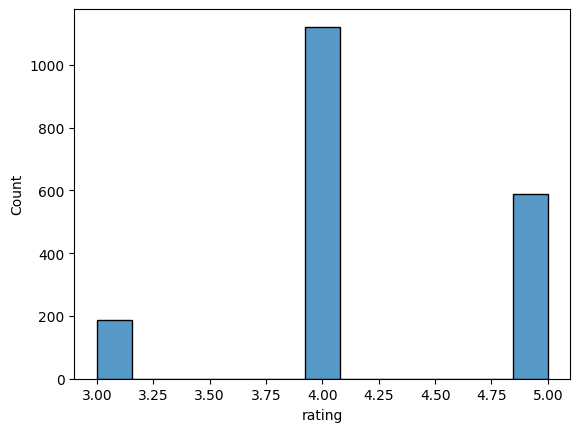

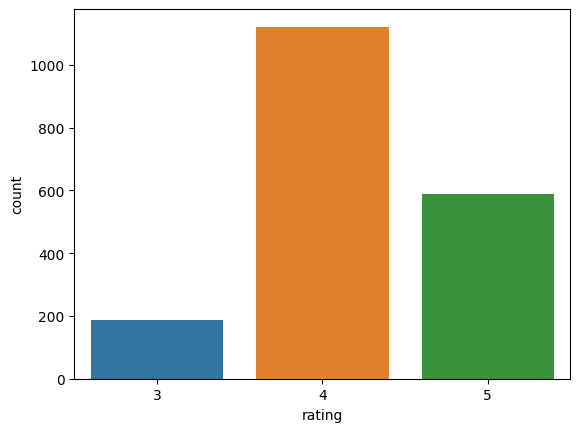

In [ ]:
# Rating histogram
sns.histplot(data=df, x="rating")
plt.show()
# Rating count plot
sns.countplot(data=df, x='rating')
plt.show()

## Cuisine Type Section

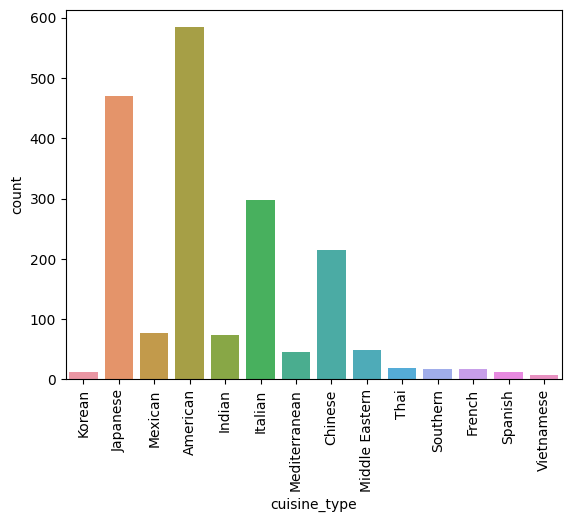

In [ ]:
# Cuisine Type countplot
sns.countplot(data=df, x="cuisine_type")
plt.xticks(rotation=90)
plt.show()


## Day of the Week Section

In [ ]:
# Check the unique values
df['day_of_the_week'].nunique()

2

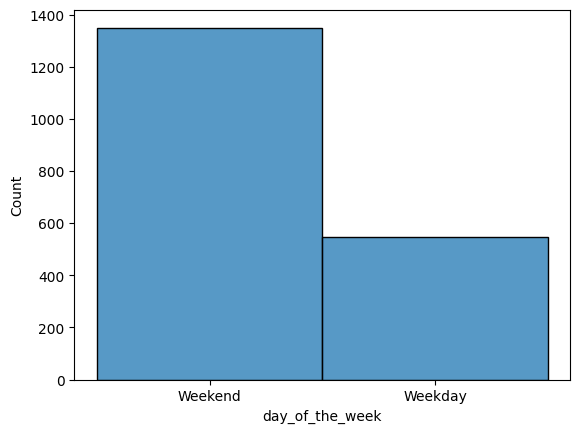

In [ ]:
sns.histplot(data=df,x='day_of_the_week')
plt.show()

## Delivery Time Section

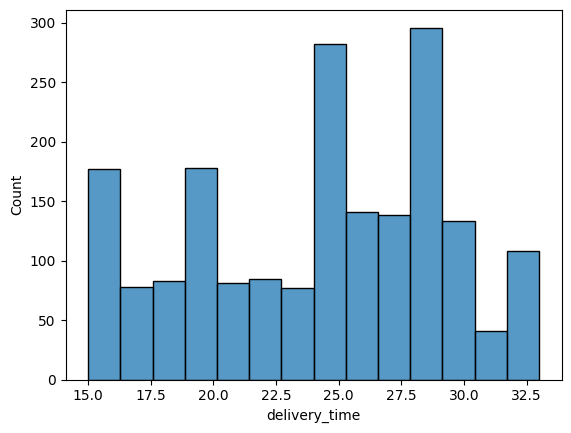

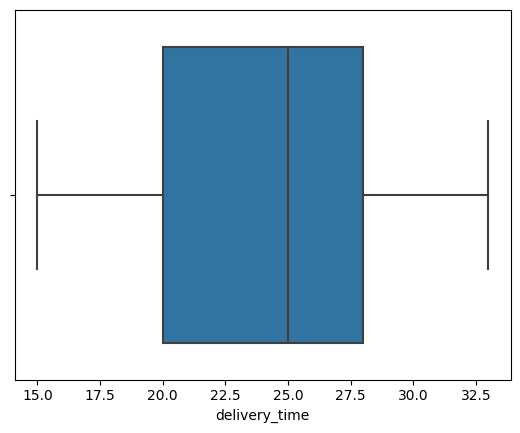

In [ ]:
# Delivery Time graphs
sns.histplot(data=df,x='delivery_time')
plt.show()
sns.boxplot(data=df,x='delivery_time')
plt.show()

### **Question 7**: Which are the top 5 restaurants in terms of the number of orders received? [1 mark]

In [ ]:
# Get top 5 restaurants with highest number of orders
df['restaurant_name'].value_counts()

Shake Shack                  219
The Meatball Shop            132
Blue Ribbon Sushi            119
Blue Ribbon Fried Chicken     96
Parm                          68
                            ... 
Sushi Choshi                   1
Dos Caminos Soho               1
La Follia                      1
Philippe Chow                  1
'wichcraft                     1
Name: restaurant_name, Length: 178, dtype: int64

In [ ]:
# Values as percentages
df['restaurant_name'].value_counts(normalize=True)

Shake Shack                  0.115385
The Meatball Shop            0.069547
Blue Ribbon Sushi            0.062698
Blue Ribbon Fried Chicken    0.050580
Parm                         0.035827
                               ...   
Sushi Choshi                 0.000527
Dos Caminos Soho             0.000527
La Follia                    0.000527
Philippe Chow                0.000527
'wichcraft                   0.000527
Name: restaurant_name, Length: 178, dtype: float64

#### Observations:
## The Top 5 Restaurants by number of orders are:
* The Shake Shack
* The Meatball Shop
* Blue Ribbon Sushi
* Blue Ribbon Fried Chicken
* Parm


### **Question 8**: Which is the most popular cuisine on weekends? [1 mark]

In [ ]:
# Get most popular cuisine on weekends
df_weekend = df[df['day_of_the_week'] == 'Weekend']
df_weekend['cuisine_type'].value_counts()

American          415
Japanese          335
Italian           207
Chinese           163
Mexican            53
Indian             49
Mediterranean      32
Middle Eastern     32
Thai               15
French             13
Korean             11
Southern           11
Spanish            11
Vietnamese          4
Name: cuisine_type, dtype: int64

### Observations:

* The most popular cuisine on the weekends is: American.
* It is also the most popular on the weekday as well.

### **Question 9**: What percentage of the orders cost more than 20 dollars? [2 marks]

In [ ]:
# Create list of orders above $20
orders_above_20 = df[df['cost_of_the_order']>20]

# Access the total in the list. If you don't specify the index position, you get both the rows & columns, super annoying
orders_above_20.shape[0]
print(orders_above_20.shape[0])

# Convert new list to a percent by dividing the number of orders above 20 by the total number of orders, then divide by 100
order_percent= (555 / 1898)*100
# to restrict the float value to 3 decimal places
print(order_percent)

555
29.24130663856691


#### Observations:
## 29% of orders cost more than $20


### **Question 10**: What is the mean order delivery time? [1 mark]

In [ ]:
# Create a variable
df['delivery_time'].mean()

24.161749209694417

#### Observations:
## The Mean Order Delivery Time is 24 minutes


### **Question 11:** The company has decided to give 20% discount vouchers to the top 3 most frequent customers. Find the IDs of these customers and the number of orders they placed. [1 mark]

In [ ]:
# Get top 3 most frequent customers
df['customer_id'].value_counts()

52832     13
47440     10
83287      9
250494     8
259341     7
          ..
385426     1
254913     1
289597     1
74412      1
397537     1
Name: customer_id, Length: 1200, dtype: int64

In [ ]:
df['customer_id'].value_counts().head(3)

52832    13
47440    10
83287     9
Name: customer_id, dtype: int64

In [ ]:
customer_count = df.groupby('customer_id')['order_id'].count().reset_index()
customer_count[customer_count['order_id'] > 1]

,customer_id,order_id
4,6987,2
6,14869,3
11,27609,3
12,35309,2
13,35432,2
...,...,...
1172,395616,2
1173,396432,2
1183,398952,2
1189,399520,2


#### Observations:
## The 3 Most Frequent Customers by Id and number of Orders
* ID #: 52832, Orders Placed: 13
* ID #: 47440, Orders Placed: 10
* ID #: 83287, Orders Placed: 9


### Multivariate Analysis

### **Question 12**: Perform a multivariate analysis to explore relationships between the important variables in the dataset. (It is a good idea to explore relations between numerical variables as well as relations between numerical and categorical variables) [10 marks]


### Cuisine Multivariate Analysis

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 [Text(0, 0, 'Korean'),
  Text(1, 0, 'Japanese'),
  Text(2, 0, 'Mexican'),
  Text(3, 0, 'American'),
  Text(4, 0, 'Indian'),
  Text(5, 0, 'Italian'),
  Text(6, 0, 'Mediterranean'),
  Text(7, 0, 'Chinese'),
  Text(8, 0, 'Middle Eastern'),
  Text(9, 0, 'Thai'),
  Text(10, 0, 'Southern'),
  Text(11, 0, 'French'),
  Text(12, 0, 'Spanish'),
  Text(13, 0, 'Vietnamese')])

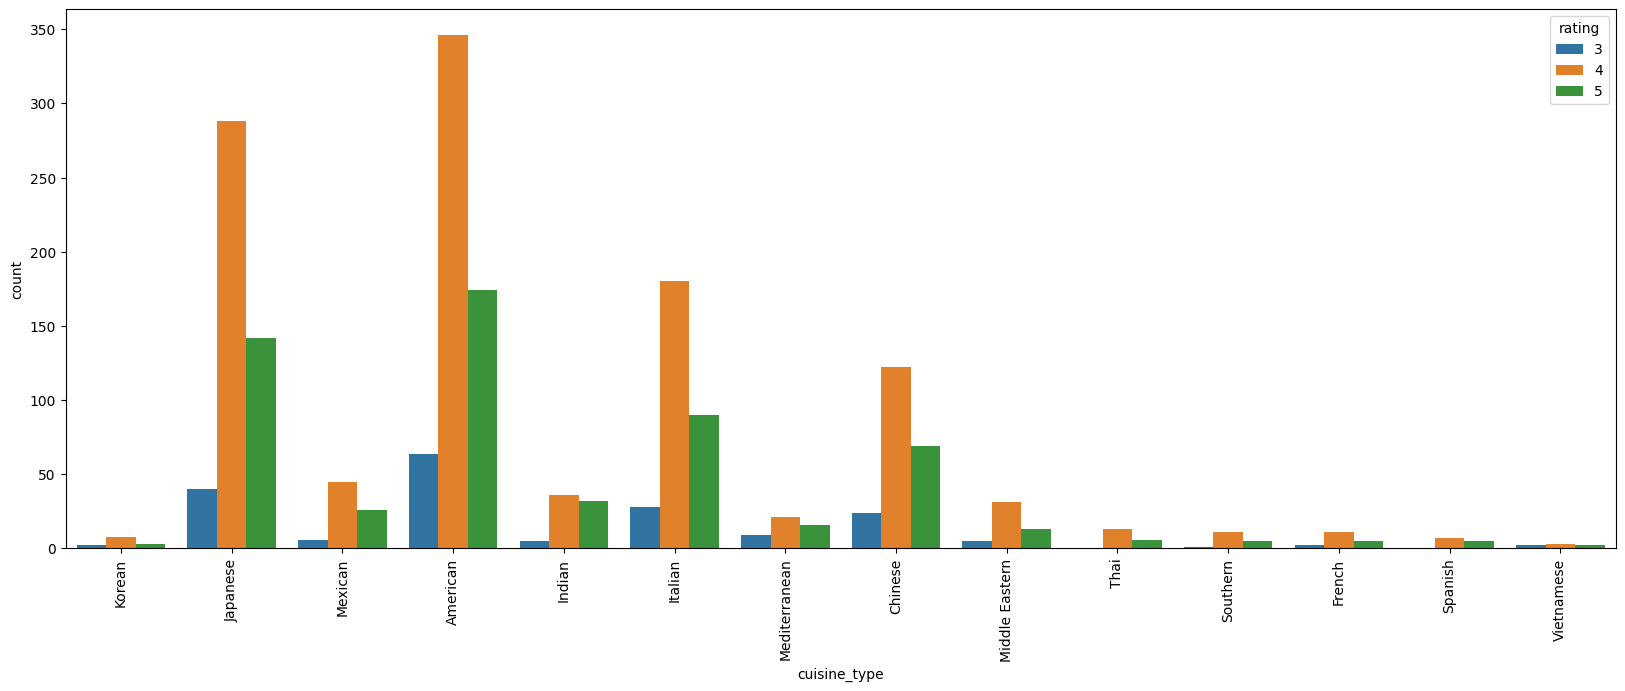

In [ ]:
plt.figure(figsize=(20,7))
sns.countplot(data=df, x='cuisine_type', hue='rating')
plt.xticks(rotation=90)

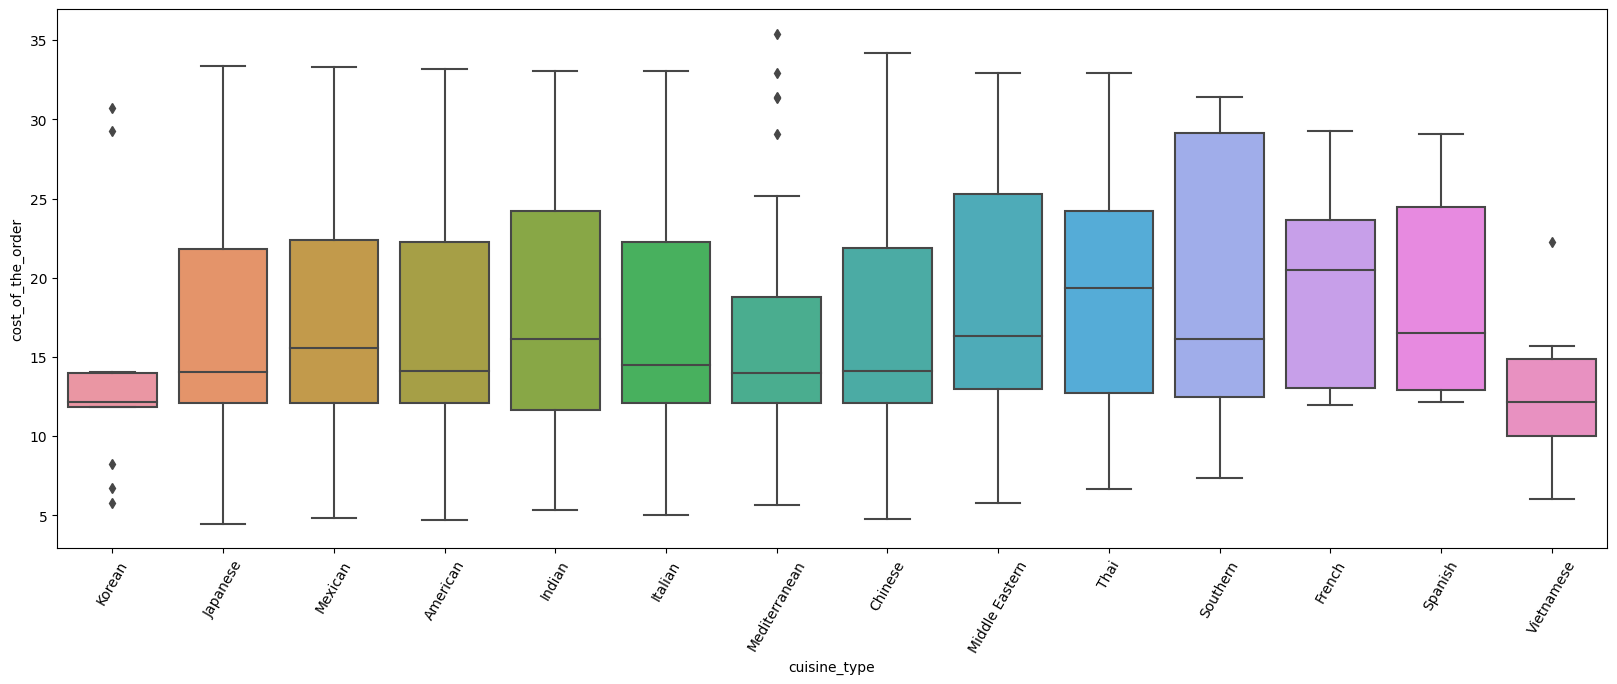

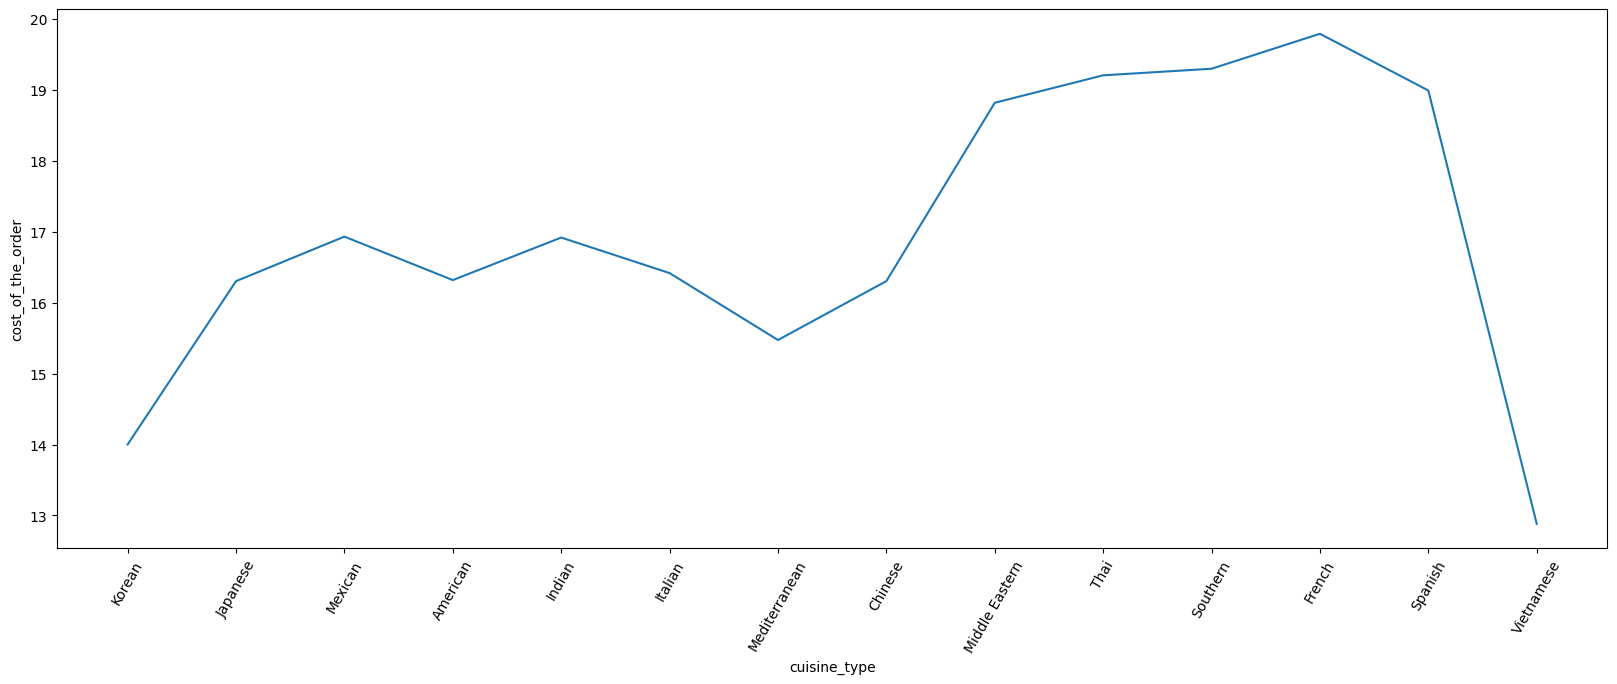

In [ ]:
plt.figure(figsize=(20,7))
sns.boxplot(data=df, x = "cuisine_type", y = "cost_of_the_order")
plt.xticks(rotation = 60)
plt.show()

plt.figure(figsize=(20,7))
sns.lineplot(data=df, x= "cuisine_type", y= "cost_of_the_order", errorbar=None)
plt.xticks(rotation = 60)
plt.show()

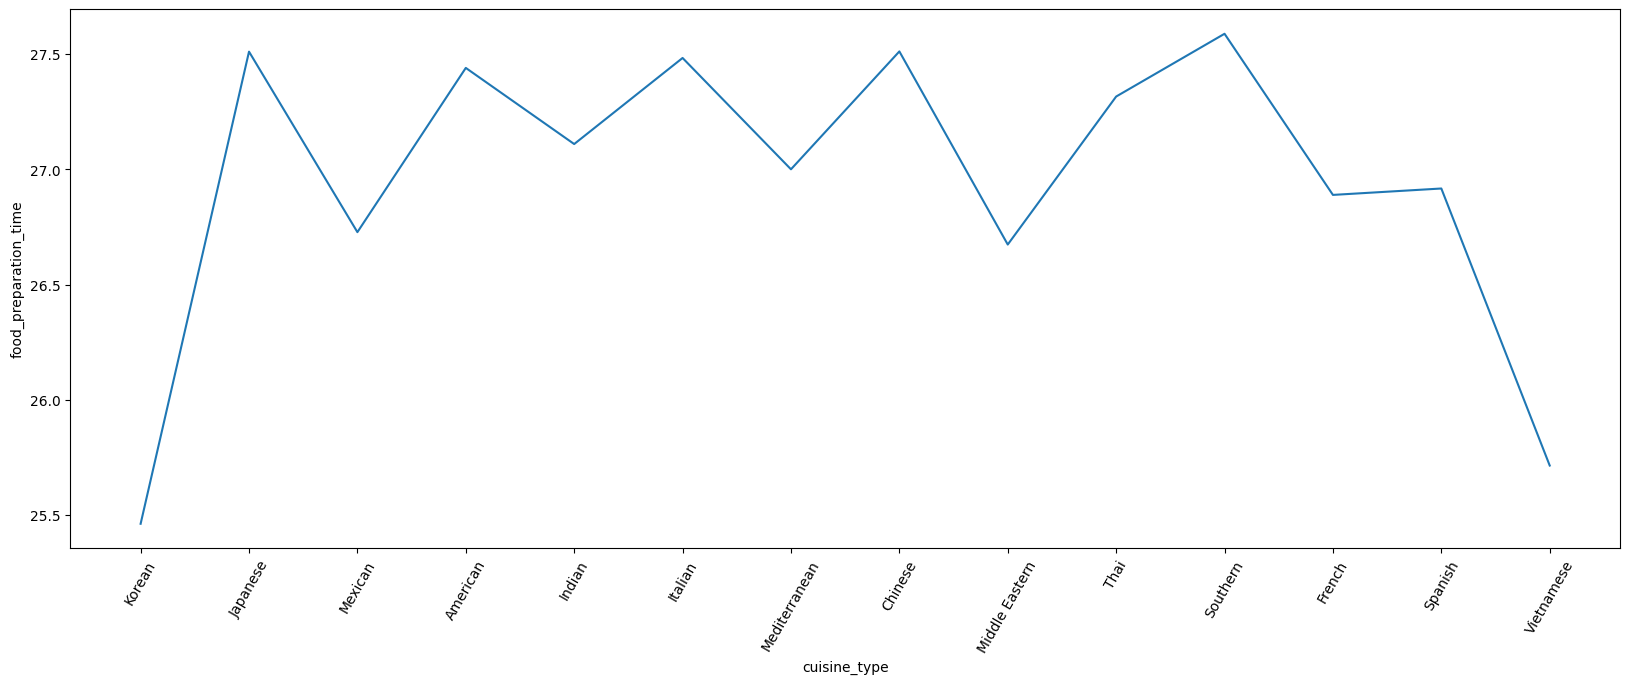

In [ ]:
plt.figure(figsize=(20,7))
sns.lineplot(data=df, x = "cuisine_type", y = "food_preparation_time", errorbar=None)
plt.xticks(rotation = 60)
plt.show();

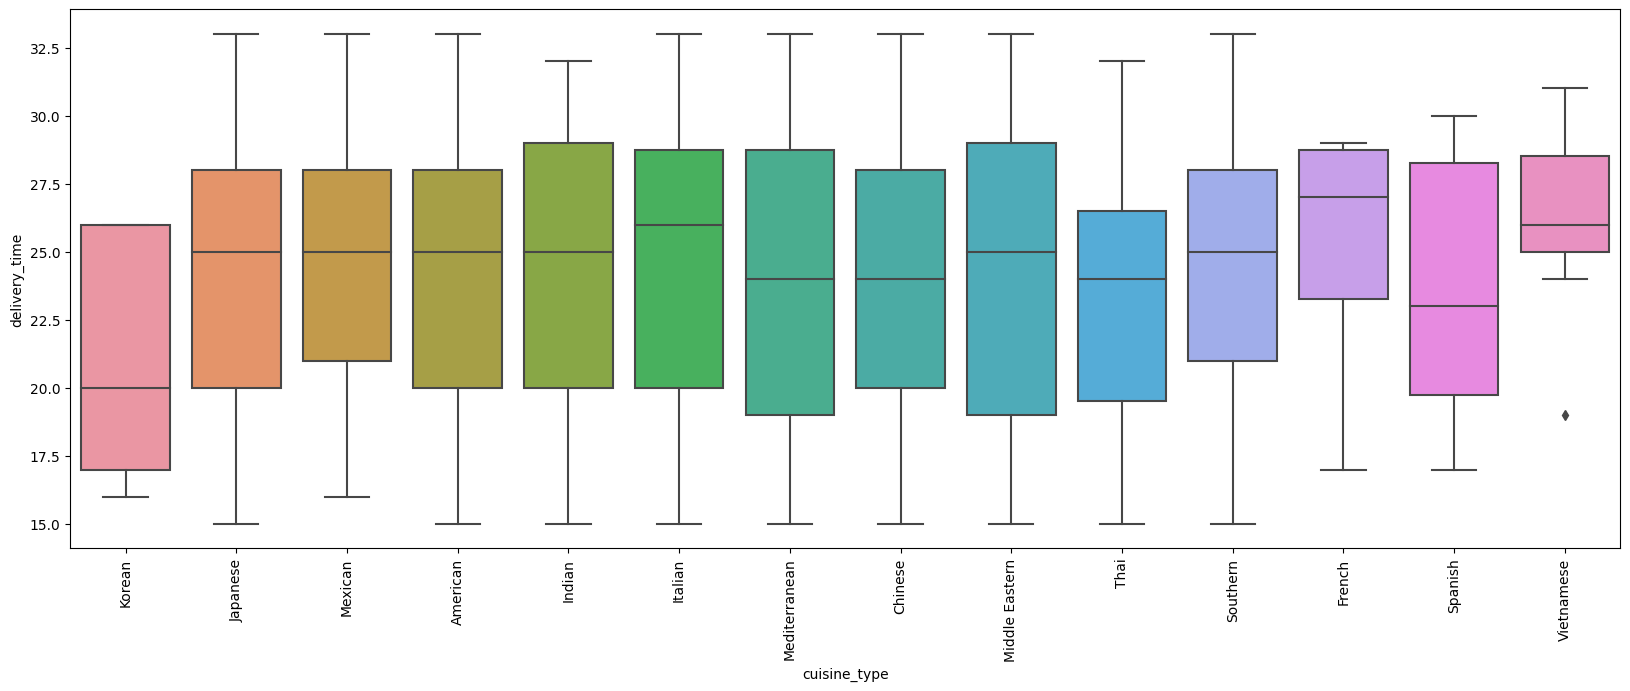

In [ ]:
plt.figure(figsize=(20,7))
sns.boxplot(data=df, x = "cuisine_type", y = "delivery_time")
plt.xticks(rotation = 90)
plt.show()

In [ ]:
sub_df=df[(df['rating']==3) | (df['rating']== 4) | (df['rating']==5)]

print(sub_df.groupby('cuisine_type')['rating'].value_counts(normalize=True))

cuisine_type    rating
American        4        0.592
                5        0.298
                3        0.110
Chinese         4        0.567
                5        0.321
                3        0.112
French          4        0.611
                5        0.278
                3        0.111
Indian          4        0.493
                5        0.438
                3        0.068
Italian         4        0.604
                5        0.302
                3        0.094
Japanese        4        0.613
                5        0.302
                3        0.085
Korean          4        0.615
                5        0.231
                3        0.154
Mediterranean   4        0.457
                5        0.348
                3        0.196
Mexican         4        0.584
                5        0.338
                3        0.078
Middle Eastern  4        0.633
                5        0.265
                3        0.102
Southern        4        0.647
                

## Restaurant Multivariant Analysis

In [ ]:
restaurant_rating_df=df[(df['rating']==3) | (df['rating']== 4) | (df['rating']==5)]

print(restaurant_rating_df.groupby('restaurant_name')['rating'].value_counts(normalize=True))

restaurant_name   rating
'wichcraft        5        1.000
12 Chairs         4        0.750
                  5        0.250
5 Napkin Burger   4        0.600
                  3        0.200
                            ... 
ilili Restaurant  4        0.667
                  5        0.222
                  3        0.111
indikitch         4        0.750
                  5        0.250
Name: rating, Length: 333, dtype: float64


In [ ]:
restaurant_rating_df.value_counts()

order_id  customer_id  restaurant_name            cuisine_type  cost_of_the_order  day_of_the_week  rating  food_preparation_time  delivery_time
1476547   83095        Bareburger                 American      6.840              Weekend          5       22                     24               1
1477807   38050        Blue Ribbon Sushi          Japanese      12.710             Weekday          4       24                     28               1
1477819   35309        Blue Ribbon Sushi          Japanese      25.220             Weekday          4       31                     24               1
1477818   144352       Shake Shack                American      22.360             Weekend          4       27                     27               1
1477817   335897       Sushi of Gari 46           Japanese      12.180             Weekday          4       24                     27               1
                                                                                                         

In [ ]:
df.groupby(['restaurant_name'])['rating'].sum().sort_values(ascending = False).head(14)

restaurant_name
Shake Shack                      913
The Meatball Shop                571
Blue Ribbon Sushi                492
Blue Ribbon Fried Chicken        405
Parm                             277
RedFarm Broadway                 246
RedFarm Hudson                   226
TAO                              206
Han Dynasty                      194
Blue Ribbon Sushi Bar & Grill    189
Nobu Next Door                   176
Sushi of Gari 46                 152
Rubirosa                         151
Momoya                           126
Name: rating, dtype: int64

In [ ]:
df.groupby(['restaurant_name'])['cost_of_the_order'].sum().sort_values(ascending = False).head(14)

restaurant_name
Shake Shack                     3579.530
The Meatball Shop               2145.210
Blue Ribbon Sushi               1903.950
Blue Ribbon Fried Chicken       1662.290
Parm                            1112.760
RedFarm Broadway                 965.130
RedFarm Hudson                   921.210
TAO                              834.500
Han Dynasty                      755.290
Blue Ribbon Sushi Bar & Grill    666.620
Rubirosa                         660.450
Sushi of Gari 46                 640.870
Nobu Next Door                   623.670
Five Guys Burgers and Fries      506.470
Name: cost_of_the_order, dtype: float64

## Additional Miltivariate Analysis

<ipython-input-41-d0d74349c728>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, cmap="Spectral", vmin=-1, vmax=1)


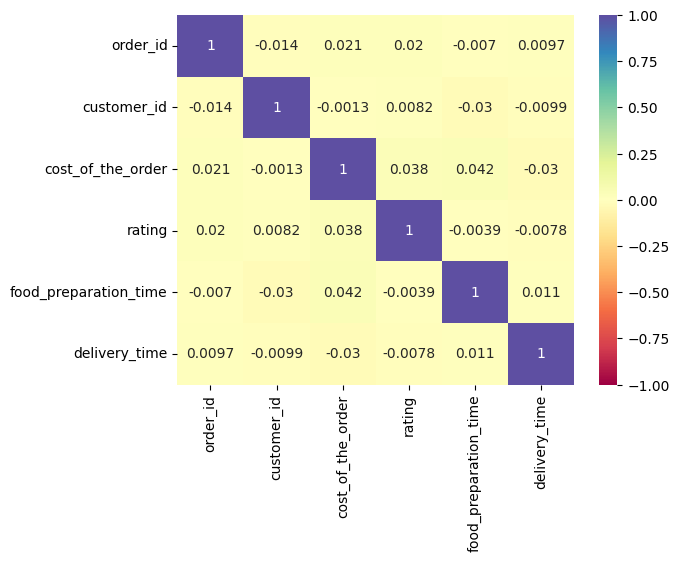

In [ ]:
# The heatmap doesn't show any correlation between the numerical variables in this dataset.
sns.heatmap(df.corr(), annot=True, cmap="Spectral", vmin=-1, vmax=1)
plt.show()

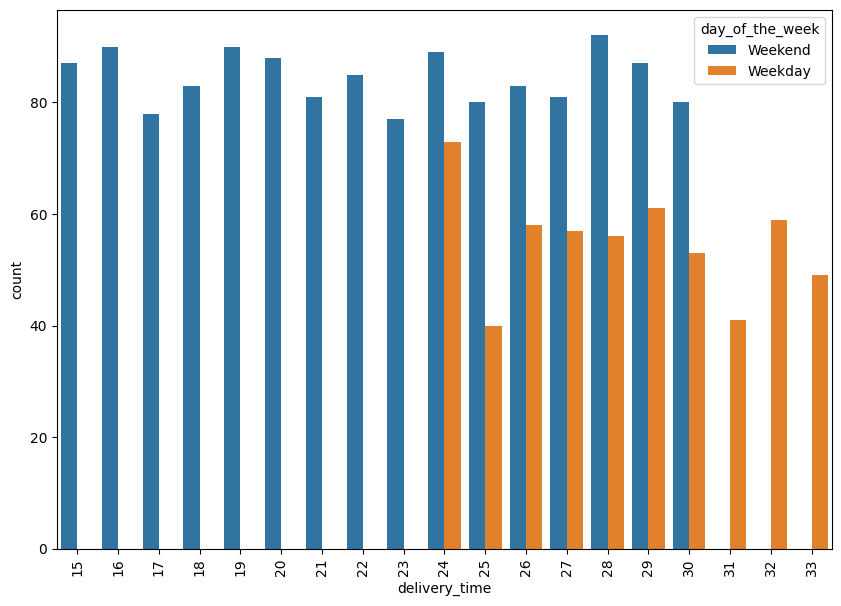

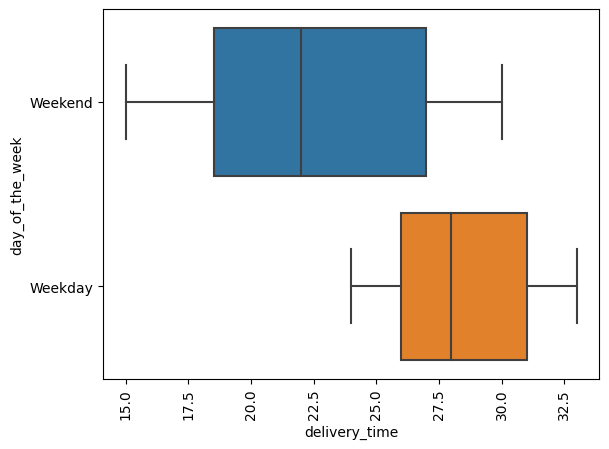

In [ ]:
# This shows a definite correlation between delivery time and day of the week
plt.figure(figsize=(10,7))
sns.countplot(data=df, x='delivery_time', hue='day_of_the_week')
plt.xticks(rotation=90)
plt.show()

sns.boxplot(data=df, x='delivery_time', y='day_of_the_week')
plt.xticks(rotation=90)
plt.show()

## Rating Multivariate Analysis

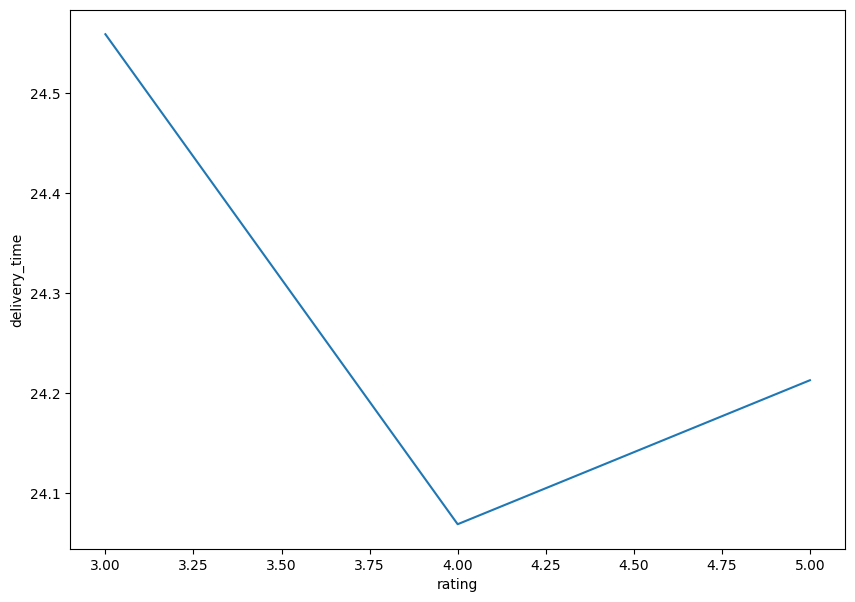

In [ ]:
# This shows a correlation between rating and delivery time
plt.figure(figsize=(10, 7))
sns.lineplot(data=df, x = 'rating', y = 'delivery_time', errorbar= None, markers = True)
plt.show()


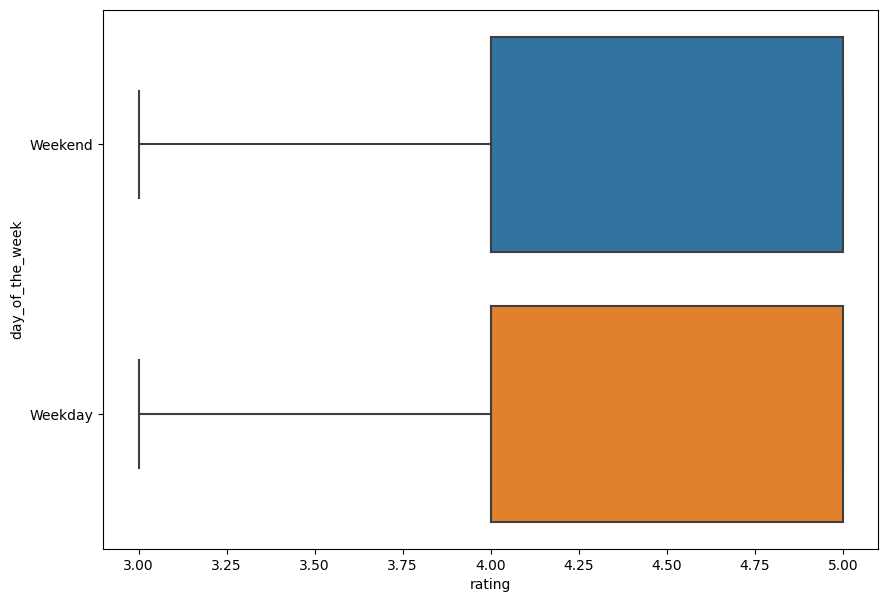

In [ ]:
# This shows there doesn't appear to be a correlation between rating and day of the week
plt.figure(figsize=(10, 7))
sns.boxplot(data=df, x = 'rating', y = 'day_of_the_week')
plt.show()


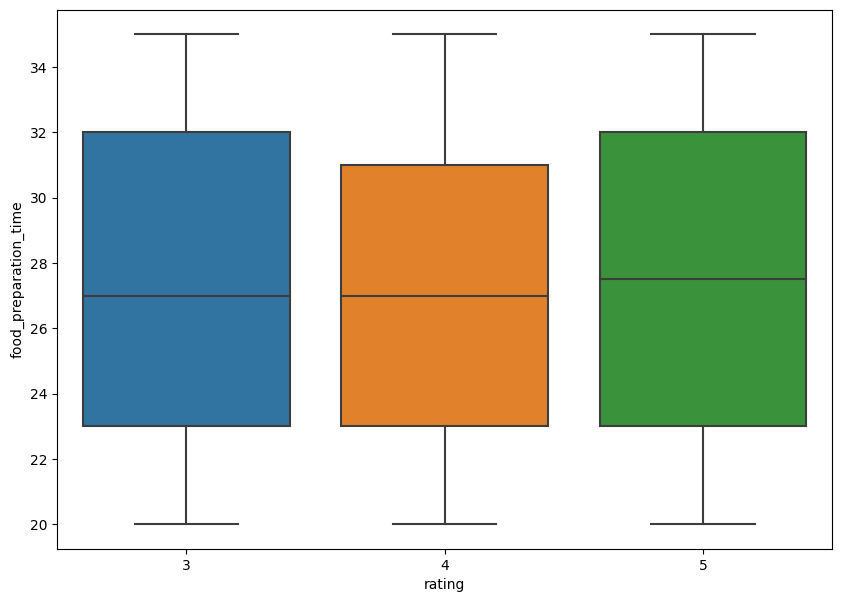

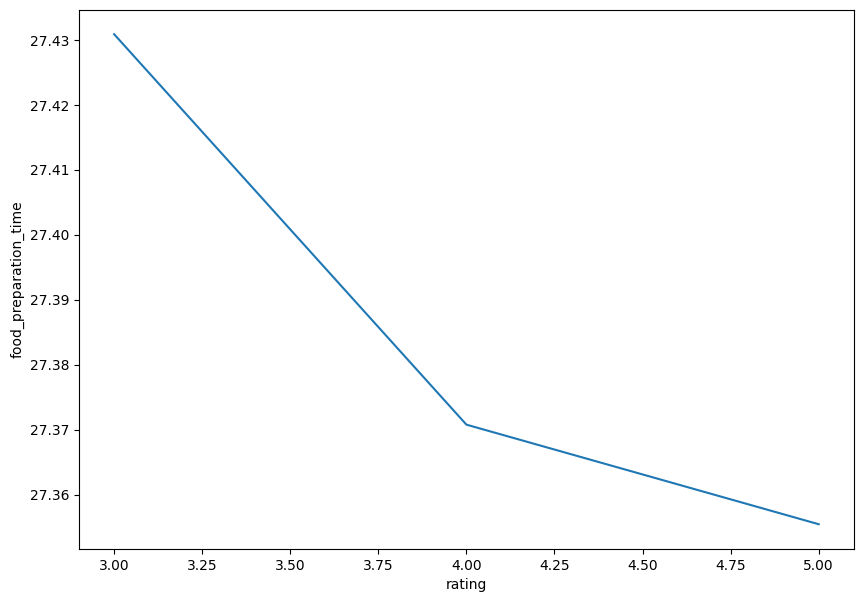

In [ ]:
# The boxplot doesn't show a distinct correlation between rating & food prep, but the lineplot does
plt.figure(figsize=(10, 7))
sns.boxplot(data=df, x = 'rating', y = 'food_preparation_time')
plt.show()

plt.figure(figsize=(10, 7))
sns.lineplot(data=df, x = 'rating', y = 'food_preparation_time', errorbar=None)
plt.show()

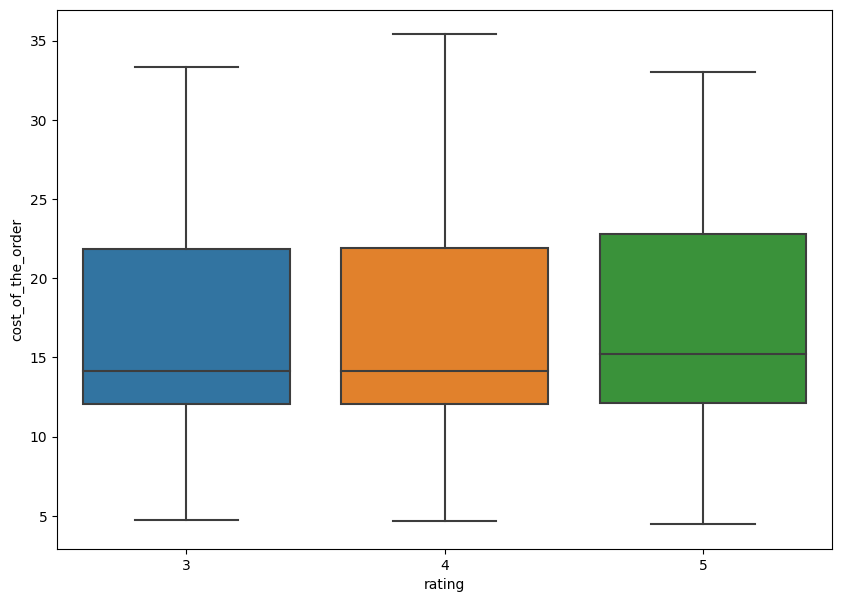

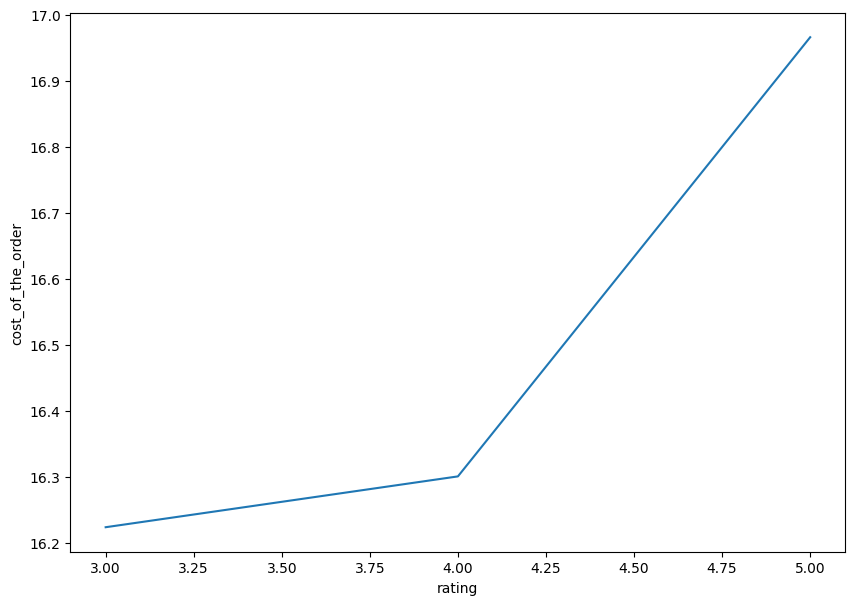

In [ ]:
# Both plots seems to indicate that the costlier the meal, the higher the rating
plt.figure(figsize=(10, 7))
sns.boxplot(data=df, x = 'rating', y = 'cost_of_the_order')
plt.show()

plt.figure(figsize=(10, 7))
sns.lineplot(data=df, x = 'rating', y = 'cost_of_the_order', errorbar=None)
plt.show()

### **Question 13:** The company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Find the restaurants fulfilling the criteria to get the promotional offer. [3 marks]

In [ ]:
# Filter the rated restaurants
# What if you make a copy & remove "Not given"
df_rated = df[df['rating'] != 'Not given'].copy()

# Convert rating column from object to integer
df_rated['rating'] = df_rated['rating'].astype('int')

# Create a dataframe that contains the restaurant names with their rating counts
df_rating_count = df_rated.groupby(['restaurant_name'])['rating'].count().sort_values(ascending = False).reset_index()
df_rating_count.head()

,restaurant_name,rating
0,Shake Shack,133
1,The Meatball Shop,84
2,Blue Ribbon Sushi,73
3,Blue Ribbon Fried Chicken,64
4,RedFarm Broadway,41


In [ ]:
# Get the restaurant names that have rating count more than 50
rest_names = df_rating_count['restaurant_name'][df_rating_count['rating'] > 50]

# Filter to get the data of restaurants that have rating count more than 50
df_mean_4 = df_rated[df_rated['restaurant_name'].isin(rest_names)].copy()

# Group the restaurant names with their ratings and find the mean rating of each restaurant
df_mean_4.groupby(['restaurant_name'])['rating'].mean().sort_values(ascending = False).reset_index().dropna()

,restaurant_name,rating
0,The Meatball Shop,4.512
1,Blue Ribbon Fried Chicken,4.328
2,Shake Shack,4.278
3,Blue Ribbon Sushi,4.219


#### Observations:


### **Question 14:** The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Find the net revenue generated by the company across all orders. [3 marks]

In [ ]:
# prompt: The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Find the net revenue generated by the company across all orders

# Calculate the commission for each order
df['commission'] = df['cost_of_the_order'].apply(lambda x: 0.25 * x if x > 20 else 0.15 * x if x > 5 else 0)

# Calculate the net revenue
df['net_revenue'] = df['cost_of_the_order'] - df['commission']

# Print the total net revenue
print(df['net_revenue'].sum())


25148.517


In [ ]:
#function to determine the revenue
def compute_rev(x):
    if x > 20:
        return x*0.25
    elif x > 5:
        return x*0.15
    else:
        return x*0

df['Revenue'] = df['cost_of_the_order'].apply(compute_rev)
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time,commission,net_revenue,Revenue
0,1477147,337525,Hangawi,Korean,30.750,Weekend,Not given,25,20,7.688,23.062,7.688
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.080,Weekend,Not given,25,23,1.812,10.268,1.812
2,1477070,66393,Cafe Habana,Mexican,12.230,Weekday,5,23,28,1.835,10.396,1.835
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.200,Weekend,3,25,15,7.300,21.900,7.300
4,1478249,76942,Dirty Bird to Go,American,11.590,Weekday,4,25,24,1.738,9.851,1.738


In [ ]:
total_rev=df['Revenue'].sum()
print('The net revenue is arount', round(total_rev, 2), 'dollars')

The net revenue is arount 6166.3 dollars


In [ ]:
# Or do it this way
cost= df['cost_of_the_order']
income= 0
for i in range(len(cost)):
  if cost[i]>5 and cost[i]<= 20:
    income= income + cost[i]*0.15
  elif cost[i]>20:
    income= income + cost[i]*.25
  else:
    income= income + cost[i]*0

print("The total net revenue generated is: $", round(income, 2))

The total net revenue generated is: $ 6166.3


#### Observations:


### **Question 15:** The company wants to analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed? (The food has to be prepared and then delivered.) [2 marks]

In [ ]:
# Write# We need to add the Food Prep column to the Delivery Time column & store it in a new column
df['total_time']= df['food_preparation_time'] + df['delivery_time']

# Collect all orders taking longer than 60 mins
time_greater_than_60= df[df['total_time'] > 60]

# Get the shape of time_greater_than_60
print('The number of orders taking longer than 60 minutes from ordered to deliverd is:', time_greater_than_60.shape[0])

# Convert shape into a percent
total_time_percent= (time_greater_than_60.shape[0] / df.shape[0]) *100

# Round percent
print("Percent of orders taking longer than 60 minutes:", round(total_time_percent, 2), "%")

The number of orders taking longer than 60 minutes from ordered to deliverd is: 200
Percent of orders taking longer than 60 minutes: 10.54 %


In [ ]:
# Or you can do it this way
df['total_time']=df['food_preparation_time'] + df['delivery_time']

print("The percentage of orders that have more than 60 miutes of total delivery time is", round(df[df['total_time'] >60].shape[0] / df.shape[0] * 100, 2), '&')

The percentage of orders that have more than 60 miutes of total delivery time is 10.54 &


#### Observations:


### **Question 16:** The company wants to analyze the delivery time of the orders on weekdays and weekends. How does the mean delivery time vary during weekdays and weekends? [2 marks]

In [ ]:
# What is the mean delivery time on weekends?
week_day= df[df['day_of_the_week']== 'Weekday']['delivery_time'].mean()
print("The mean, or average, delivery time on weekdays is:", round(week_day), "minutes")

weekend= df[df['day_of_the_week']== 'Weekend']['delivery_time'].mean()
print("The mean, or average, delivery time on weekends is:", round(weekend), "minutes")

The mean, or average, delivery time on weekdays is: 28 minutes
The mean, or average, delivery time on weekends is: 22 minutes


In [ ]:
# Or you can do it like this
print('The mean delivery time on weekdays is around',
      round(df[df['day_of_the_week'] == 'Weekday']['delivery_time'].mean()),
     'minutes')
print('The mean delivery time on weekdays is around',
      round(df[df['day_of_the_week'] == 'Weekend']['delivery_time'].mean()),
     'minutes')

The mean delivery time on weekdays is around 28 minutes
The mean delivery time on weekdays is around 22 minutes


In [ ]:
# Or do it this way
df.groupby('day_of_the_week')['delivery_time'].mean()

day_of_the_week
Weekday   28.340
Weekend   22.470
Name: delivery_time, dtype: float64